In [136]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.dataset import dataset_experiments
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
common_folder = '/scratch/pp2681/mom6/Feb2022/bare'
exps = ('R2', 'R4', 'R8', 'R16', 'R32', 'R64')

In [138]:
ds = dataset_experiments(common_folder, exps)

# Relative vorticity in units of local Coriolis parameter

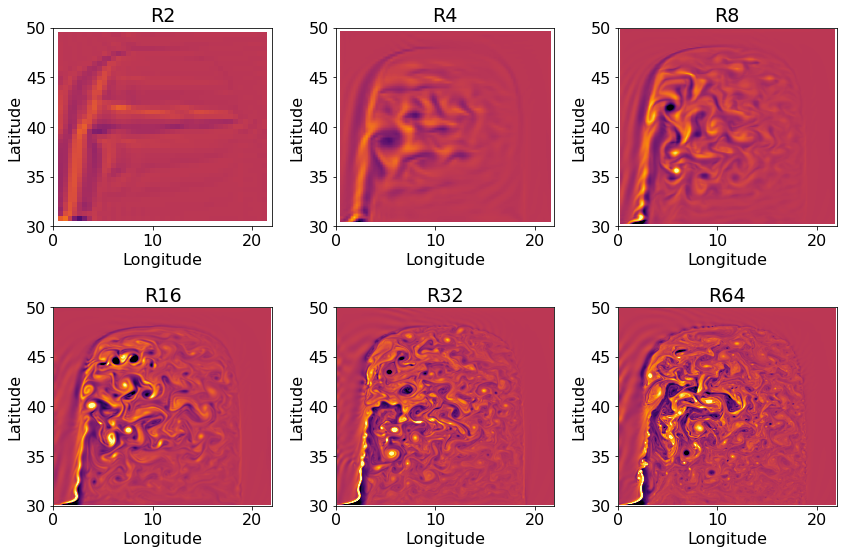

In [166]:
ds.plot_relative_vorticity_snapshot(('R2','R4','R8','R16','R32','R64'))

# Analysis of mean flow: 10-years mean Sea Surface Height

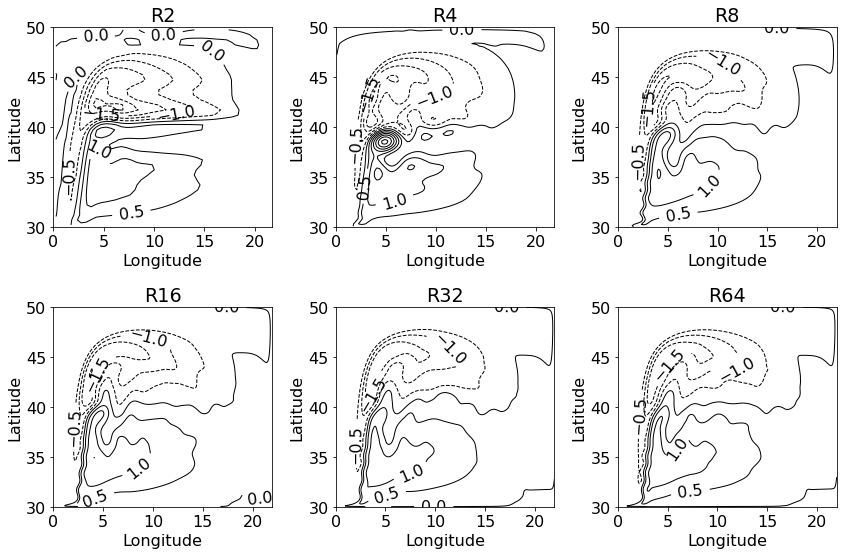

In [167]:
ds.plot_ssh(('R2', 'R4', 'R8', 'R16', 'R32', 'R64'))

# Analysis of Kinetic Energy w.r.t. $1/64^o$ model

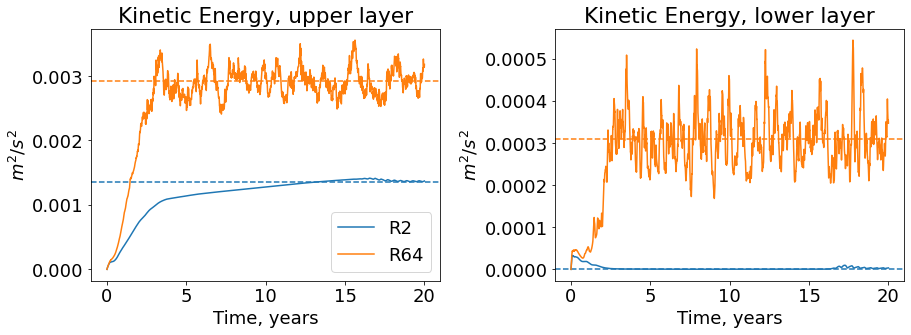

In [168]:
ds.plot_KE(('R2', 'R64'))

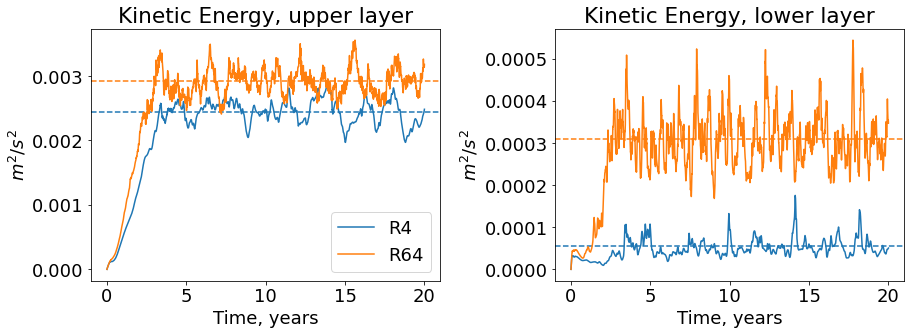

In [169]:
ds.plot_KE(('R4', 'R64'))

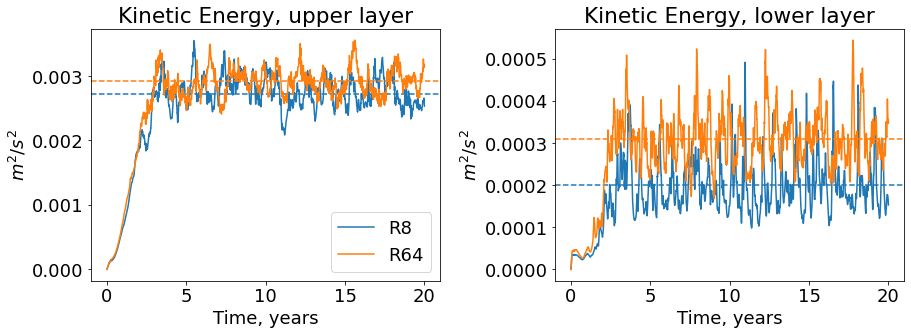

In [170]:
ds.plot_KE(('R8', 'R64'))

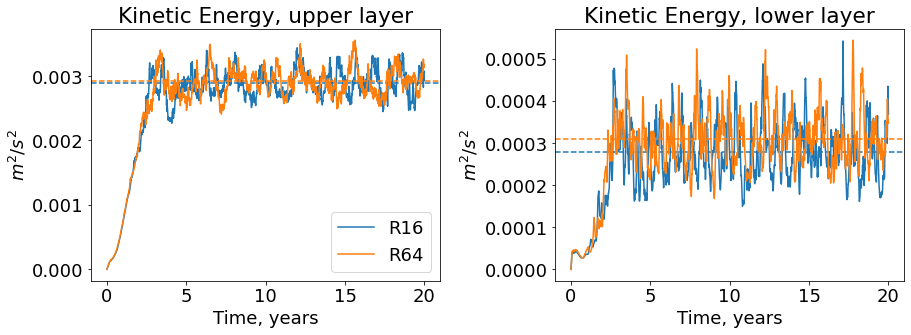

In [171]:
ds.plot_KE(('R16', 'R64'))

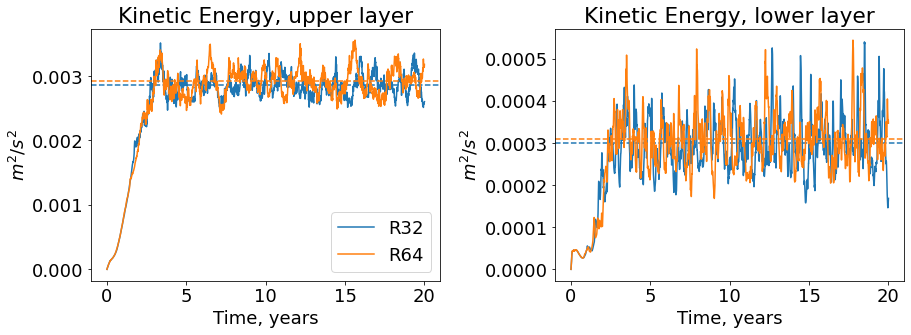

In [172]:
ds.plot_KE(('R32', 'R64'))